In [2]:
pip install pandas


     ---------------------------------------- 10.9/10.9 MB 2.6 MB/s eta 0:00:00
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.io

In [57]:
os.path.abspath("C:\\Users\\Saranya.Sakkarapani\\Bearing_data\\2nd_test\\2nd_test")

'C:\\Users\\Saranya.Sakkarapani\\Bearing_data\\2nd_test\\2nd_test'

In [2]:
file_path = "C:\\Users\\Saranya.Sakkarapani\\Bearing_data\\2nd_test\\2nd_test"
file_name = '2004.02.12.10.32'

In [3]:
file_path

'C:\\Users\\Saranya.Sakkarapani\\Bearing_data\\1st_test\\1st_test'

In [4]:
data = pd.read_csv(os.path.join(file_path, file_name),sep = '\t',header=None)

In [5]:
data

0      1      2      3      4      5      6      7
0     -0.022 -0.039 -0.183 -0.054 -0.105 -0.134 -0.129 -0.142
1     -0.105 -0.017 -0.164 -0.183 -0.049  0.029 -0.115 -0.122
2     -0.183 -0.098 -0.195 -0.125 -0.005 -0.007 -0.171 -0.071
3     -0.178 -0.161 -0.159 -0.178 -0.100 -0.115 -0.112 -0.078
4     -0.208 -0.129 -0.261 -0.098 -0.151 -0.205 -0.063 -0.066
...      ...    ...    ...    ...    ...    ...    ...    ...
20475 -0.022 -0.142  0.085 -0.078 -0.200 -0.198 -0.134 -0.093
20476  0.024 -0.156  0.042 -0.039 -0.159 -0.071 -0.227 -0.132
20477 -0.193 -0.303 -0.071 -0.125 -0.237 -0.251 -0.151  0.007
20478 -0.115  0.076 -0.078 -0.332 -0.027 -0.002 -0.151 -0.005
20479 -0.042  0.098  0.103 -0.059 -0.002 -0.342 -0.095 -0.276

[20480 rows x 8 columns]

In [11]:
bearing_no = 0
bearing_data = np.array(data.iloc[:,bearing_no])

In [12]:
bearing_data

array([-0.022, -0.105, -0.183, ..., -0.193, -0.115, -0.042])

In [13]:
temp = bearing_data 

In [14]:
# feature extraction
feature_matrix = np.zeros((1,9))

Calculating the following features for the dataset df<br>
1.Max value<br>
2.Min value<br>
3.Mean<br>
4.Sd<br>
5.RMS<br>
6.Skewness<br>
7.Krutosis<br>
8.Crest factor = Max/RMS<br>
9.Form factor =RMS/Mean 

In [15]:
def skew(x):
    
    n = len(x)
    third_moment = np.sum((x-np.mean(x))**3)/n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment / s_3 

In [16]:
def kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x-np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [17]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = skew(temp)
feature_matrix[0,6] = kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [18]:
df = pd.DataFrame(feature_matrix)
df.index = [file_name[:-3]]

In [19]:
df

0     1         2         3         4         5  \
2003.10.22.12.06.13  0.388 -0.72 -0.094593  0.081124  0.124614 -0.029991   

                            6         7        8  
2003.10.22.12.06.13  1.068765  3.113619 -1.31737

In [21]:
T_matrix = pd.DataFrame()

test_set = 1
bearing_no = 1

file_path = r"C:\\Users\\Saranya.Sakkarapani\\Bearing_data\\1st_test\\1st_test"
for file_name in os.listdir(file_path):
    
    data_set = pd.read_csv(os.path.join(file_path, file_name), sep = '\t',header=None)
    bearing_data = np.array(data_set.iloc[:,bearing_no-1])
    temp = bearing_data 
    
    # feature extraction
    feature_matrix = np.zeros((1,9))
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = skew(temp)
    feature_matrix[0,6] = kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index = [file_name[:-3]]
    
    T_matrix = T_matrix.append(df)
    
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# T_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crestfactor','Formfactor']
# T_matrix.index = pd.to_datetime(T_matrix.index, format='%Y.%m.%d.%H.%M')

# T_matrix = T_matrix.sort_index()

# T_matrix.to_csv('Time_feature_matrix_bearing_{}_Test_ {}.csv'.format(bearing_no,test_set))
    

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_15928\1139519831.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)


In [58]:
T_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crestfactor','Formfactor']
T_matrix.index = pd.to_datetime(T_matrix.index, format='%Y.%m.%d.%H.%M')

T_matrix = T_matrix.sort_index()

T_matrix.to_csv('Time_feature_matrix_bearing_{}_Test_ {}.csv'.format(bearing_no,test_set))

In [59]:
T_matrix = pd.DataFrame()

test_set = 3
bearing_no = 2

file_path = r"C:\\Users\\Saranya.Sakkarapani\\Downloads\\Bearing_data\\3rd_test\\3rd_test\\txt"
for file_name in os.listdir(file_path):
    
    data_set = pd.read_csv(os.path.join(file_path, file_name), sep = '\t',header=None)
    bearing_data = np.array(data_set.iloc[:,bearing_no-1])
    temp = bearing_data 
    
    # feature extraction
    feature_matrix = np.zeros((1,9))
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = skew(temp)
    feature_matrix[0,6] = kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index = [file_name[:-3]]
    
    T_matrix = T_matrix.append(df)
    

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\3120851057.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

In [60]:
T_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crestfactor','Formfactor']
T_matrix.index = pd.to_datetime(T_matrix.index, format='%Y.%m.%d.%H.%M')

T_matrix = T_matrix.sort_index()

T_matrix.to_csv('Time_feature_matrix_bearing_{}_Test_ {}.csv'.format(bearing_no,test_set))

In [61]:
T_matrix = pd.DataFrame()

test_set = 3
bearing_no = 3

file_path = r"C:\\Users\\Saranya.Sakkarapani\\Downloads\\Bearing_data\\3rd_test\\3rd_test\\txt"
for file_name in os.listdir(file_path):
    
    data_set = pd.read_csv(os.path.join(file_path, file_name), sep = '\t',header=None)
    bearing_data = np.array(data_set.iloc[:,bearing_no-1])
    temp = bearing_data 
    
    # feature extraction
    feature_matrix = np.zeros((1,9))
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = skew(temp)
    feature_matrix[0,6] = kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index = [file_name[:-3]]
    
    T_matrix = T_matrix.append(df)
    

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\4025204587.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

In [62]:
T_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crestfactor','Formfactor']
T_matrix.index = pd.to_datetime(T_matrix.index, format='%Y.%m.%d.%H.%M')

T_matrix = T_matrix.sort_index()

T_matrix.to_csv('Time_feature_matrix_bearing_{}_Test_ {}.csv'.format(bearing_no,test_set))

In [66]:
T_matrix = pd.DataFrame()

test_set = 3
bearing_no = 4

file_path = r"C:\\Users\\Saranya.Sakkarapani\\Downloads\\Bearing_data\\3rd_test\\3rd_test\\txt"
for file_name in os.listdir(file_path):
    
    data_set = pd.read_csv(os.path.join(file_path, file_name), sep = '\t',header=None)
    bearing_data = np.array(data_set.iloc[:,bearing_no-1])
    temp = bearing_data 
    
    # feature extraction
    feature_matrix = np.zeros((1,9))
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = skew(temp)
    feature_matrix[0,6] = kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index = [file_name[:-3]]
    
    T_matrix = T_matrix.append(df)
    

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_1540\1585522223.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  T_matrix = T_matrix.append(df)
C:\Users\Sar

In [67]:
T_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crestfactor','Formfactor']
T_matrix.index = pd.to_datetime(T_matrix.index, format='%Y.%m.%d.%H.%M')

T_matrix = T_matrix.sort_index()

T_matrix.to_csv('Time_feature_matrix_bearing_{}_Test_ {}.csv'.format(bearing_no,test_set))

In [68]:
T_matrix

Max    Min      Mean       Std       RMS  Skewness  \
2004-03-04 09:27:00  0.254 -0.303 -0.004331  0.055325  0.055493  0.038845   
2004-03-04 09:32:00  0.212 -0.249 -0.006725  0.052926  0.053351  0.013904   
2004-03-04 09:42:00  0.278 -0.278 -0.003200  0.052607  0.052703  0.034235   
2004-03-04 09:52:00  0.269 -0.300 -0.004379  0.054671  0.054844  0.007403   
2004-03-04 10:02:00  0.227 -0.247 -0.003443  0.053805  0.053914  0.023473   
...                    ...    ...       ...       ...       ...       ...   
2004-04-18 02:02:00  0.867 -0.955 -0.003682  0.248059  0.248081 -0.026558   
2004-04-18 02:12:00  0.918 -0.813 -0.003608  0.253635  0.253654  0.104431   
2004-04-18 02:22:00  1.082 -1.104 -0.003425  0.279849  0.279863  0.002889   
2004-04-18 02:32:00  0.881 -0.969 -0.003452  0.282160  0.282174 -0.108601   
2004-04-18 02:42:00  0.005 -0.002  0.001419  0.001187  0.001850  0.475456   

                     Kurtosis  Crestfactor  Formfactor  
2004-03-04 09:27:00  0.559706     4.577189  -12.813293  
2004-03-04 09:32:00  0.355708     3.973709   -7.932665  
2004-03-04 09:42:00  0.477955     5.274828  -16.469227  
2004-03-04 09:52:00  0.341732     4.904798  -12.524926  
2004-03-04 10:02:00  0.261460     4.210398  -15.660536  
...                       ...          ...         ...  
2004-04-18 02:02:00  0.022271     3.494830  -67.379632  
2004-04-18 02:12:00 -0.257887     3.619096  -70.304147  
2004-04-18 02:22:00  0.030199     3.866172  -81.701455  
2004-04-18 02:32:00 -0.486148     3.122183  -81.743400  
2004-04-18 02:42:00  1.016386     2.702101    1.303627  

[6324 rows x 9 columns]

In [56]:
df1 = pd.read_csv("Time_feature_matrix_bearing_1_Test_ 2.csv")
df2 = pd.read_csv("Time_feature_matrix_bearing_2_Test_ 2.csv")
df3 = pd.read_csv("Time_feature_matrix_bearing_3_Test_ 2.csv")
df4 = pd.read_csv("Time_feature_matrix_bearing_4_Test_ 2.csv")


In [57]:
df1 = pd.read_csv("Time_feature_matrix_bearing_1_Test_ 2.csv")
df1 = pd.read_csv("Time_feature_matrix_bearing_1_Test_ 2.csv", index_col = [0])
df1.index = pd.to_datetime(df1.index)
df1

In [58]:
df1

Max    Min      Mean       Std       RMS  Skewness  \
2004-02-12 10:32:00  0.454 -0.386 -0.010196  0.073477  0.074179  0.083987   
2004-02-12 10:42:00  0.369 -0.388 -0.002585  0.075340  0.075382  0.052138   
2004-02-12 10:52:00  0.503 -0.400 -0.002484  0.076191  0.076230  0.032806   
2004-02-12 11:02:00  0.608 -0.576 -0.002277  0.078693  0.078724  0.041483   
2004-02-12 11:12:00  0.391 -0.391 -0.002404  0.078439  0.078474  0.028222   
...                    ...    ...       ...       ...       ...       ...   
2004-02-19 05:42:00  4.998 -5.000 -0.002752  0.725014  0.725001 -0.510519   
2004-02-19 05:52:00  2.688 -2.881 -0.004487  0.462001  0.462012 -0.325344   
2004-02-19 06:02:00  3.501 -3.696 -0.001703  0.483844  0.483835 -0.377068   
2004-02-19 06:12:00  0.005  0.000  0.001857  0.000987  0.002103  0.579656   
2004-02-19 06:22:00  0.002 -0.005 -0.001162  0.001000  0.001533  0.317009   

                      Kurtosis  Crestfactor  Formfactor  
2004-02-12 10:32:00   0.628408     6.120331   -7.275307  
2004-02-12 10:42:00   0.647935     4.895038  -29.161382  
2004-02-12 10:52:00   0.513132     6.598472  -30.688508  
2004-02-12 11:02:00   1.157547     7.723217  -34.579322  
2004-02-12 11:12:00   0.602825     4.982524  -32.645152  
...                        ...          ...         ...  
2004-02-19 05:42:00  12.576183     6.893779 -263.426419  
2004-02-19 05:52:00   3.759312     5.818035 -102.977656  
2004-02-19 06:02:00   4.890985     7.235932 -284.094983  
2004-02-19 06:12:00   3.636864     2.377543    1.132578  
2004-02-19 06:22:00  -1.609910     1.304860   -1.319089  

[984 rows x 9 columns]

In [59]:
df2 = pd.read_csv("Time_feature_matrix_bearing_2_Test_ 2.csv")
df2 = pd.read_csv("Time_feature_matrix_bearing_2_Test_ 2.csv", index_col = [0])
df2.index = pd.to_datetime(df2.index)
df2

Max    Min      Mean       Std       RMS  Skewness  \
2004-02-12 10:32:00  0.454 -0.386 -0.010196  0.073477  0.074179  0.083987   
2004-02-12 10:42:00  0.369 -0.388 -0.002585  0.075340  0.075382  0.052138   
2004-02-12 10:52:00  0.503 -0.400 -0.002484  0.076191  0.076230  0.032806   
2004-02-12 11:02:00  0.608 -0.576 -0.002277  0.078693  0.078724  0.041483   
2004-02-12 11:12:00  0.391 -0.391 -0.002404  0.078439  0.078474  0.028222   
...                    ...    ...       ...       ...       ...       ...   
2004-02-19 05:42:00  4.998 -5.000 -0.002752  0.725014  0.725001 -0.510519   
2004-02-19 05:52:00  2.688 -2.881 -0.004487  0.462001  0.462012 -0.325344   
2004-02-19 06:02:00  3.501 -3.696 -0.001703  0.483844  0.483835 -0.377068   
2004-02-19 06:12:00  0.005  0.000  0.001857  0.000987  0.002103  0.579656   
2004-02-19 06:22:00  0.002 -0.005 -0.001162  0.001000  0.001533  0.317009   

                      Kurtosis  Crestfactor  Formfactor  
2004-02-12 10:32:00   0.628408     6.120331   -7.275307  
2004-02-12 10:42:00   0.647935     4.895038  -29.161382  
2004-02-12 10:52:00   0.513132     6.598472  -30.688508  
2004-02-12 11:02:00   1.157547     7.723217  -34.579322  
2004-02-12 11:12:00   0.602825     4.982524  -32.645152  
...                        ...          ...         ...  
2004-02-19 05:42:00  12.576183     6.893779 -263.426419  
2004-02-19 05:52:00   3.759312     5.818035 -102.977656  
2004-02-19 06:02:00   4.890985     7.235932 -284.094983  
2004-02-19 06:12:00   3.636864     2.377543    1.132578  
2004-02-19 06:22:00  -1.609910     1.304860   -1.319089  

[984 rows x 9 columns]

In [60]:
df3 = pd.read_csv("Time_feature_matrix_bearing_3_Test_ 2.csv")
df3 = pd.read_csv("Time_feature_matrix_bearing_3_Test_ 2.csv", index_col = [0])
df3.index = pd.to_datetime(df3.index)
df3

Max    Min      Mean       Std       RMS  Skewness  \
2004-02-12 10:32:00  1.023 -0.911 -0.014541  0.108436  0.109404  0.204825   
2004-02-12 10:42:00  0.752 -0.681 -0.002461  0.109792  0.109817 -0.023852   
2004-02-12 10:52:00  0.933 -0.786 -0.001595  0.109852  0.109861  0.056557   
2004-02-12 11:02:00  1.016 -0.935 -0.003148  0.110624  0.110667  0.033548   
2004-02-12 11:12:00  0.745 -0.771 -0.001158  0.107502  0.107506 -0.002892   
...                    ...    ...       ...       ...       ...       ...   
2004-02-19 05:42:00  0.686 -0.769 -0.001911  0.170570  0.170577 -0.011975   
2004-02-19 05:52:00  0.764 -0.725 -0.001348  0.177877  0.177878  0.111051   
2004-02-19 06:02:00  0.845 -0.784 -0.001365  0.187405  0.187405  0.247077   
2004-02-19 06:12:00  0.007  0.000  0.003656  0.001496  0.003950 -0.196107   
2004-02-19 06:22:00  0.002 -0.005 -0.000664  0.000996  0.001197 -0.395420   

                     Kurtosis  Crestfactor  Formfactor  
2004-02-12 10:32:00  3.212468     9.350652   -7.523856  
2004-02-12 10:42:00  1.394821     6.847735  -44.626842  
2004-02-12 10:52:00  2.639397     8.492546  -68.858586  
2004-02-12 11:02:00  2.682224     9.180734  -35.155121  
2004-02-12 11:12:00  1.577948     6.929872  -92.797551  
...                       ...          ...         ...  
2004-02-19 05:42:00 -0.098321     4.021649  -89.261120  
2004-02-19 05:52:00 -0.319468     4.295083 -131.961801  
2004-02-19 06:02:00 -0.135942     4.508940 -137.245256  
2004-02-19 06:12:00 -1.935522     1.772075    1.080519  
2004-02-19 06:22:00 -1.069201     1.670699   -1.803891  

[984 rows x 9 columns]

In [61]:
df4 = pd.read_csv("Time_feature_matrix_bearing_4_Test_ 2.csv")
df4 = pd.read_csv("Time_feature_matrix_bearing_4_Test_ 2.csv", index_col = [0])
df4.index = pd.to_datetime(df4.index)
df4

Max    Min      Mean       Std       RMS  Skewness  \
2004-02-12 10:32:00  0.193 -0.264 -0.010026  0.053168  0.054103 -0.022078   
2004-02-12 10:42:00  0.249 -0.229 -0.003784  0.055974  0.056101  0.001582   
2004-02-12 10:52:00  0.354 -0.334 -0.003485  0.056038  0.056145  0.070444   
2004-02-12 11:02:00  0.513 -0.525 -0.003741  0.056686  0.056807 -0.036324   
2004-02-12 11:12:00  0.244 -0.212 -0.002703  0.056778  0.056841  0.019006   
...                    ...    ...       ...       ...       ...       ...   
2004-02-19 05:42:00  0.542 -0.544 -0.002939  0.148326  0.148351 -0.051945   
2004-02-19 05:52:00  0.527 -0.449 -0.003315  0.116586  0.116630  0.119884   
2004-02-19 06:02:00  0.625 -0.479 -0.003311  0.130544  0.130582  0.167966   
2004-02-19 06:12:00  0.005 -0.002  0.001786  0.001204  0.002154  0.656632   
2004-02-19 06:22:00  0.002 -0.005 -0.001695  0.001280  0.002124 -0.659071   

                     Kurtosis  Crestfactor  Formfactor  
2004-02-12 10:32:00  0.065660     3.567239   -5.396329  
2004-02-12 10:42:00  0.107236     4.438435  -14.827018  
2004-02-12 10:52:00  0.256918     6.305078  -16.108911  
2004-02-12 11:02:00  0.805818     9.030509  -15.186020  
2004-02-12 11:12:00  0.138647     4.292680  -21.032042  
...                       ...          ...         ...  
2004-02-19 05:42:00 -0.093570     3.653494  -50.473985  
2004-02-19 05:52:00  0.259273     4.518571  -35.180992  
2004-02-19 06:02:00  0.696806     4.786252  -39.440269  
2004-02-19 06:12:00  1.652267     2.321622    1.206167  
2004-02-19 06:22:00  1.170087     0.941574   -1.253000  

[984 rows x 9 columns]

# Visualization Set 2

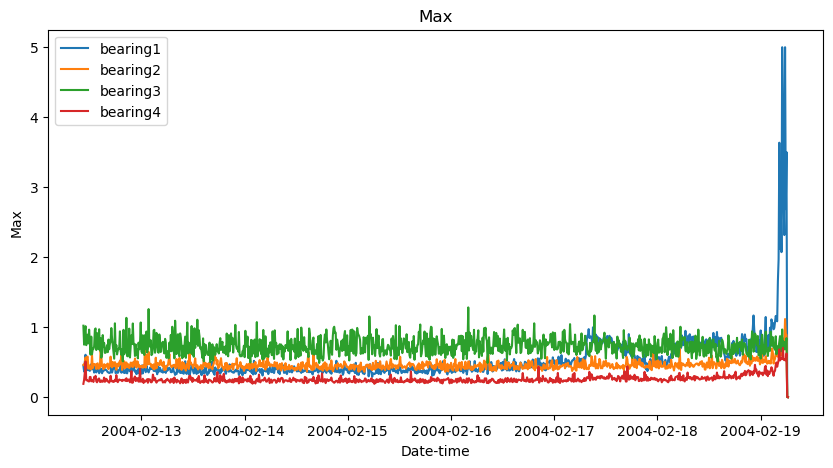

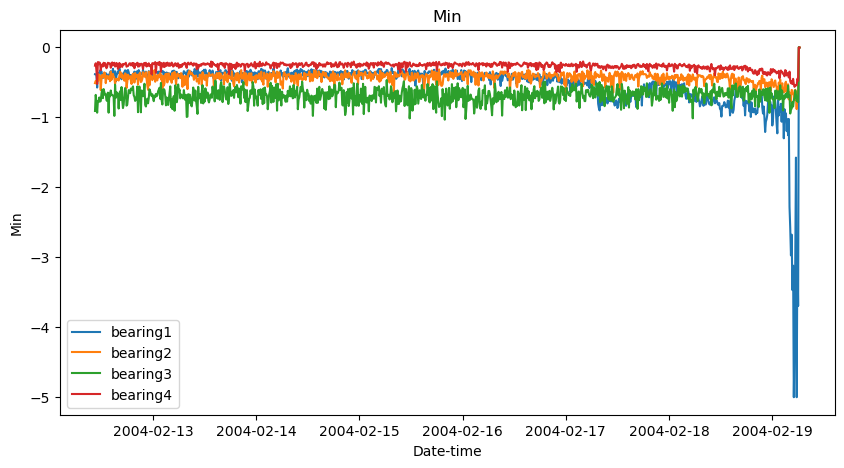

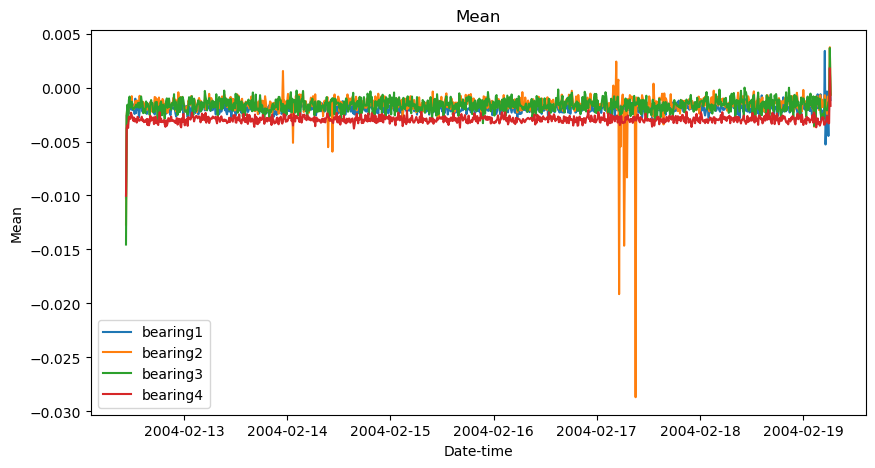

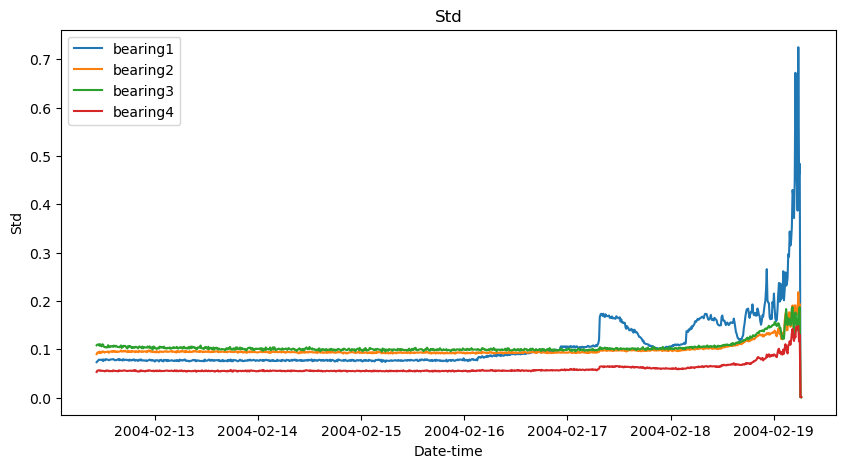

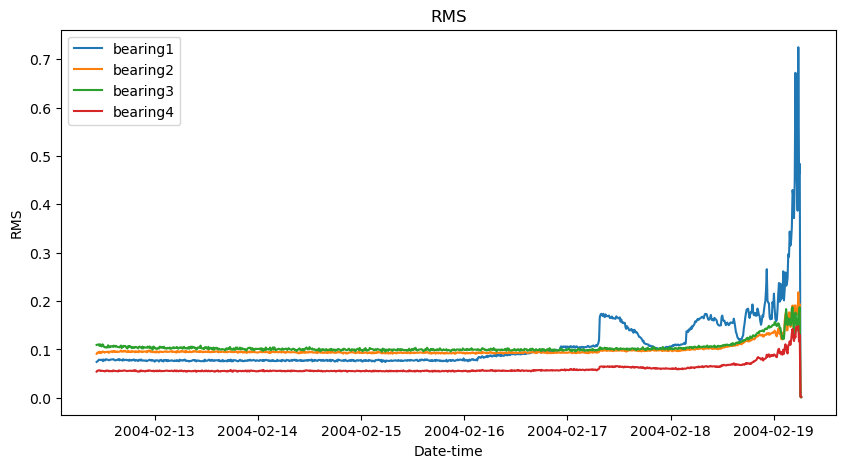

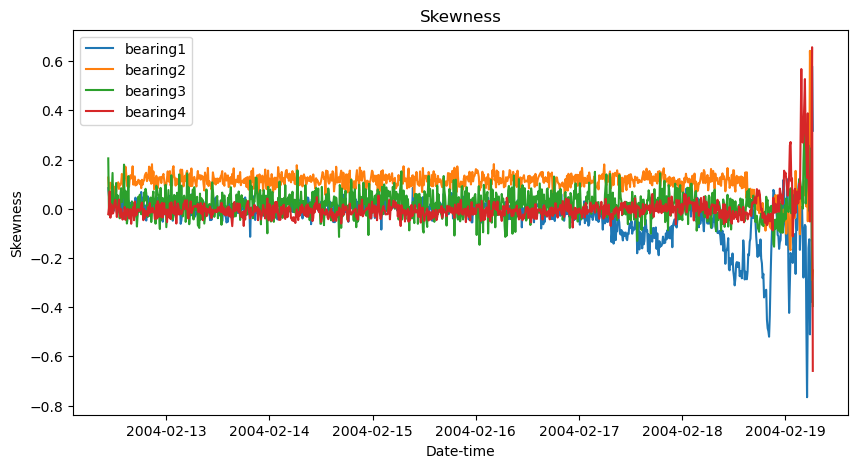

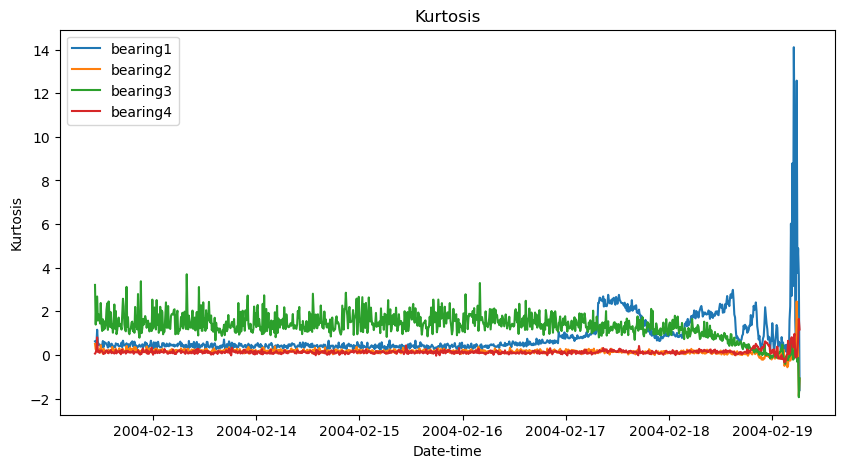

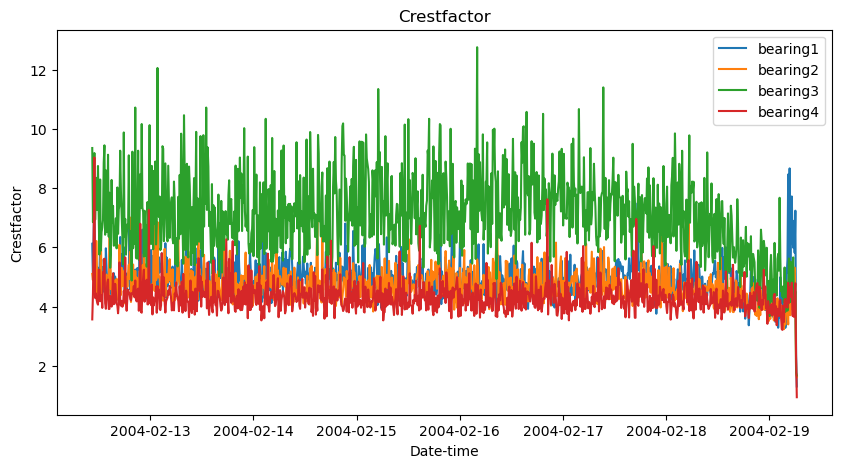

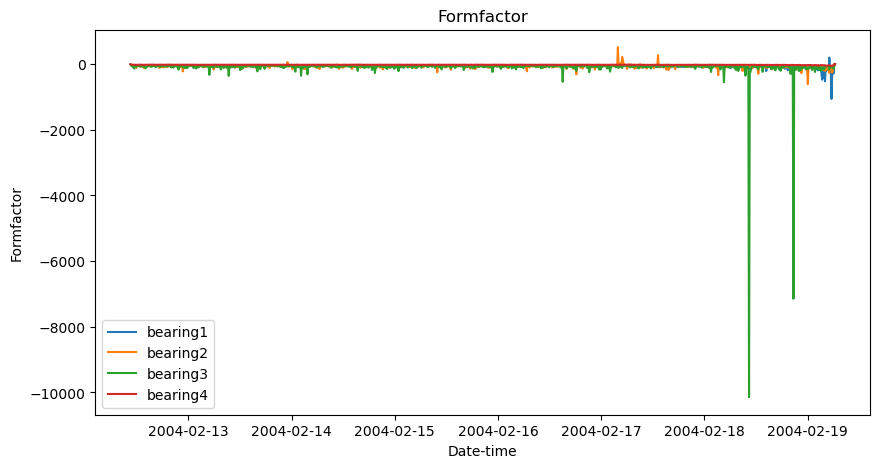

In [70]:
for col in (df1.columns):
    plt.figure(figsize=(10,5))
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing1','bearing2','bearing3','bearing4'])
    
    plt.xlabel("Date-time")
    plt.ylabel(col)
    plt.title(col)
    plt.show()